# Setup


In [258]:
! pip install babypandas
import babypandas as bpd
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [259]:
df = bpd.DataFrame()
for f in glob.glob('*.csv'):
    aux = bpd.read_csv(f, sep=';')
    df = df.append(aux)

In [260]:
import pandas as pd

data_correta = pd.to_datetime(
    df.get('data hora_boletim').values
)


In [261]:
df = df.assign(
    data_boletim = data_correta
)

In [262]:
df = df.drop(
    columns=['data hora_boletim',
             'data_inclusao',
             'valor_ups',
             'valor_ups_antiga',
             'data_alteracao_smsa',
             'descricao_ups_antiga']
).sort_values(by='data_boletim').set_index('data_boletim')


# Problema 1

In [263]:
codigos_tipo_acidente = {
    '0': 'Desconhecido',
    '1': 'Sem Vitima',
    '2': 'Com Vitima'
}

In [264]:
def codigoPraTipo (codigo):
  return codigos_tipo_acidente[codigo[6]]

stringsAcidentes = df.get('tipo_acidente').apply(codigoPraTipo)

In [265]:
df = df.drop(
    columns=['tipo_acidente', 'desc_tipo_acidente']
)

df = df.assign(
    tipo_acidente = stringsAcidentes
)

# Problema 2

<Axes: xlabel='ano,mes'>

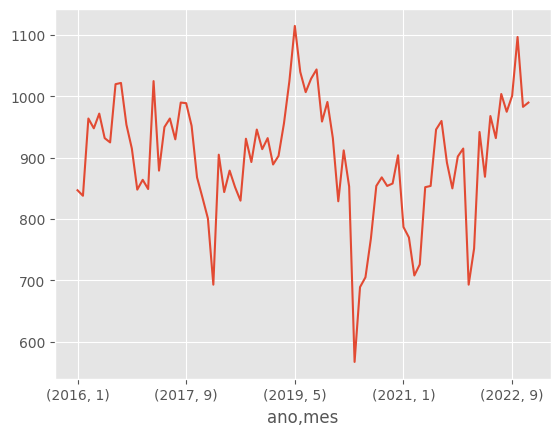

In [266]:
df.groupby(['ano', 'mes']).size().plot(kind='line')

# Problema 3

<Axes: xlabel='ano'>

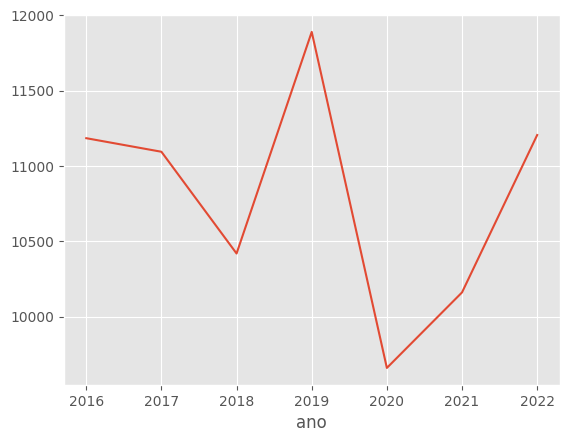

In [267]:
df.groupby('ano').size().plot(kind='line')

# Problema 4

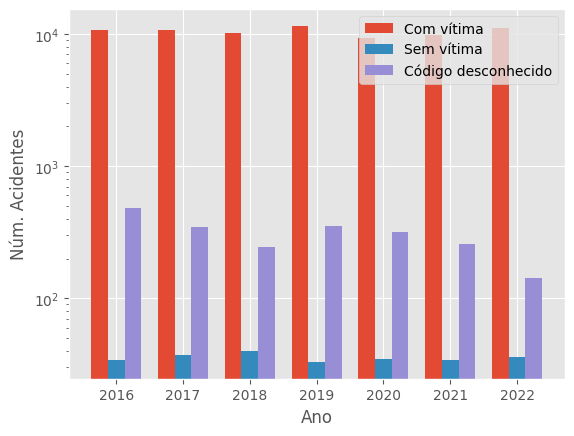

In [268]:
por_mes = df.groupby(['ano', 'tipo_acidente']).size()

com_vitima = por_mes[por_mes.index.get_level_values('tipo_acidente') == 'Com Vitima']
sem_vitima = por_mes[por_mes.index.get_level_values('tipo_acidente') == 'Sem Vitima']
desconhecido = por_mes[por_mes.index.get_level_values('tipo_acidente') == 'Desconhecido']

anos = por_mes.index.get_level_values('ano').unique()
x = np.arange(len(anos))

largura = 0.25

plt.bar(x - largura, com_vitima.values, width=largura, label='Com vítima')
plt.bar(x, sem_vitima.values, width=largura, label='Sem vítima')
plt.bar(x + largura, desconhecido.values, width=largura, label='Código desconhecido')

plt.yscale('log')

plt.xticks(x, anos)
plt.xlabel("Ano")
plt.ylabel("Núm. Acidentes")
plt.legend()

plt.show()

#Problema 5

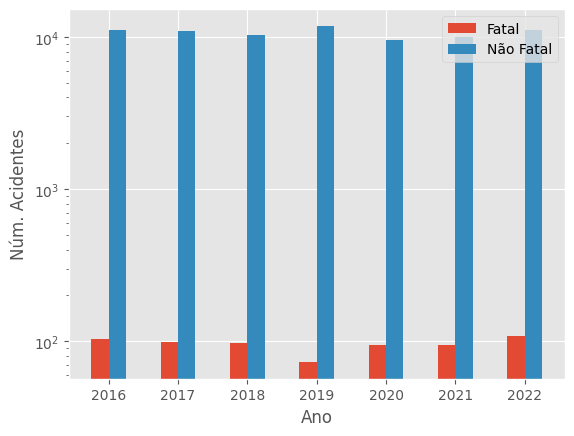

In [269]:
por_mes = df.groupby(['ano', 'indicador_fatalidade']).size()

com_fatalidade = por_mes[por_mes.index.get_level_values('indicador_fatalidade') == 'SIM']
sem_fatalidade = por_mes[por_mes.index.get_level_values('indicador_fatalidade') == 'NÃO']

plt.bar(x - largura/2, com_fatalidade.values, width=largura, label='Fatal')
plt.bar(x + largura/2, sem_fatalidade.values, width=largura, label='Não Fatal')

plt.yscale('log')

plt.xticks(x, anos)
plt.xlabel("Ano")
plt.ylabel("Núm. Acidentes")
plt.legend()

plt.show()

#Problema 6

In [270]:
def n_maiores(n, dataframe):
  organizado = dataframe.sort_values(ascending=False)
  return organizado[organizado >= organizado.iloc[n-1]]

In [271]:
por_mes = df.groupby(['ano', 'bairro', 'indicador_fatalidade']).size()

# com_fatalidade = por_mes[por_mes.index.get_level_values('indicador_fatalidade') == 'SIM']
# sem_fatalidade = por_mes[por_mes.index.get_level_values('indicador_fatalidade') == 'NÃO']

# anos = por_mes.index.get_level_values('bairro').unique()
x = np.arange(len(anos))

largura = 0.25

com_fatalidade = n_maiores(5, por_mes[por_mes.index.get_level_values('indicador_fatalidade') == 'SIM'])
sem_fatalidade = n_maiores(5, por_mes[por_mes.index.get_level_values('indicador_fatalidade') == 'NÃO'])

# bairros_com_mais_acidentes = por_mes_organizado[por_mes_organizado >= por_mes_organizado.iloc[4]]

# bairros_com_mais_acidentes.index.get_level_values('bairro')
# x = np.arange(len(bairros_com_mais_acidentes))

# plt.bar(x - largura/2, com_fatalidade.values, width=largura, label='Fatal')
# #plt.bar(x + largura/2, sem_fatalidade.values, width=largura, label='Não Fatal')

# plt.yscale('log')

# plt.xticks(x, bairros_com_mais_acidentes)
# plt.xlabel("Bairro")
# plt.ylabel("Núm. Acidentes")
# plt.legend()
# plt.show()

print(sem_fatalidade)
print(com_fatalidade)

ano   bairro            indicador_fatalidade
2016  Centro            NÃO                     467
2017  Centro            NÃO                     427
2016  Jardim Montanhês  NÃO                     418
2022  Jardim Montanhês  NÃO                     414
2019  Centro            NÃO                     408
dtype: int64
ano   bairro            indicador_fatalidade
2021  Jardim Montanhês  SIM                     15
2018  Jardim Montanhês  SIM                     14
2020  Jardim Montanhês  SIM                     14
2022  Jardim Montanhês  SIM                     14
2016  Jardim Montanhês  SIM                     14
dtype: int64


#Problema 7

<Axes: title={'center': 'Com Vítima'}, xlabel='lat', ylabel='lon'>

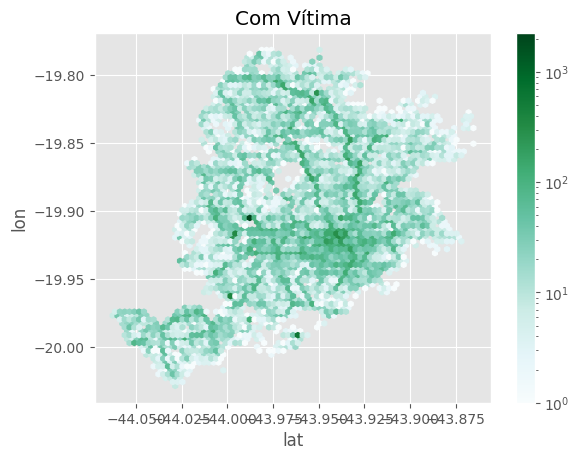

In [272]:
df[df.get('tipo_acidente') == 'Com Vitima'].plot(
  kind='hexbin',
  x='lat',
  y='lon',
  mincnt=1,
  gridsize=75,
  bins='log',
  title='Com Vítima'
 )


<Axes: title={'center': 'Sem Vítima'}, xlabel='lat', ylabel='lon'>

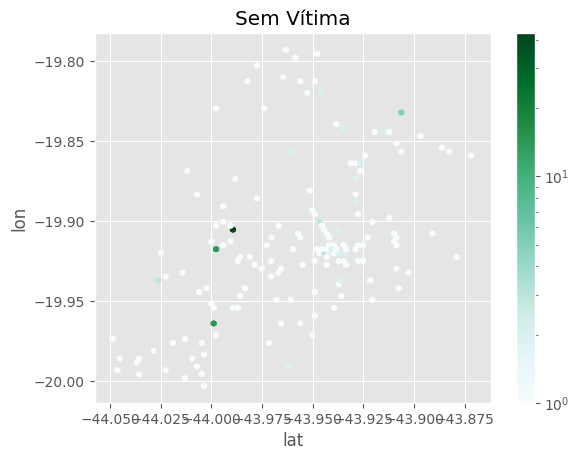

In [273]:
df[df.get('tipo_acidente') == 'Sem Vitima'].plot(
  kind='hexbin',
  x='lat',
  y='lon',
  mincnt=1,
  gridsize=75,
  bins='log',
  title='Sem Vítima'
 )

<Axes: title={'center': 'Desconhecido'}, xlabel='lat', ylabel='lon'>

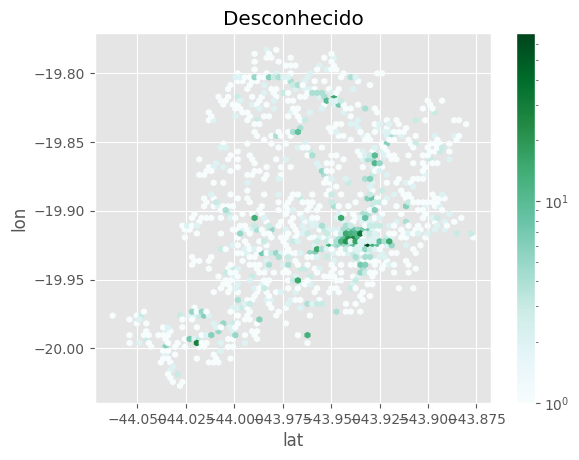

In [274]:
df[df.get('tipo_acidente') == 'Desconhecido'].plot(
  kind='hexbin',
  x='lat',
  y='lon',
  mincnt=1,
  gridsize=75,
  bins='log',
  title='Desconhecido'
 )

#Problema 8

In [275]:
acidentes_amostra = df.groupby('mes').size()

In [276]:
def bootstrap(amostra, tam_amostral, repeticoes):
    stats = np.array([])

    for i in range(repeticoes):
      resample = amostra.sample(n=tam_amostral, replace=True)
      stats = np.append(stats, resample.mean())

    return stats

resultado_bootstrap = bootstrap(acidentes_amostra, 500, 5000)

6301.583333333333

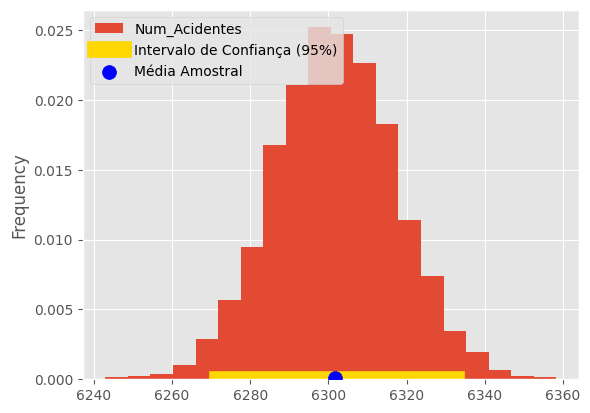

In [277]:
percentil_esquerda = np.percentile(resultado_bootstrap, 2.5)
percentil_direita = np.percentile(resultado_bootstrap, 97.5)

acidentes_mes = bpd.DataFrame().assign(Num_Acidentes = resultado_bootstrap)
acidentes_mes.plot(kind = 'hist', bins=20, density=True)

media_acidentes_mes = acidentes_amostra.mean()

plt.plot([percentil_esquerda, percentil_direita], [0, 0], color='gold', linewidth=12, label='Intervalo de Confiança (95%)', zorder=2)
plt.scatter(media_acidentes_mes, 0.0001, color='blue', s=100, label='Média Amostral', zorder=3)

plt.legend()
media_acidentes_mes

#Problema 9

In [278]:
acidentes_ano_bairro = df.groupby(['bairro', 'ano']).size().reset_index()

dados_2019 = acidentes_ano_bairro[acidentes_ano_bairro.get('ano') == 2019]
dados_2020 = acidentes_ano_bairro[acidentes_ano_bairro.get('ano') == 2020]
dados_2021 = acidentes_ano_bairro[acidentes_ano_bairro.get('ano') == 2021]

In [279]:
def plot_acidentes_por_ano(df_merge):
  df_merge.plot(kind="scatter", x="0_x", y="0_y", s=80, edgecolor="black")

  ano_1 = str(int(df_merge.get("ano_x").iloc[0]))
  ano_2 = str(int(df_merge.get("ano_y").iloc[0]))

  plt.xlabel(ano_1)
  plt.ylabel(ano_2)
  plt.title("Acidentes em " + ano_1 + " vs " + ano_2)

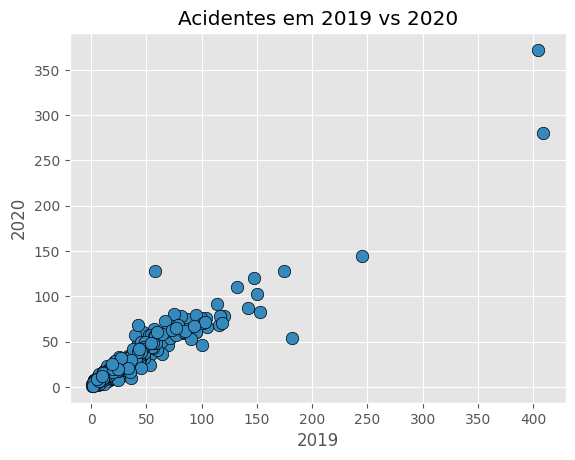

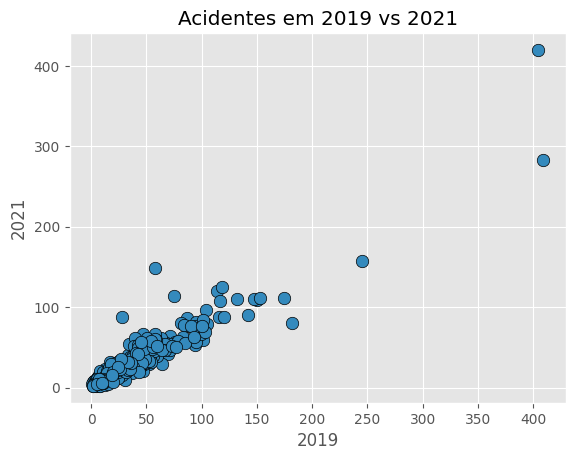

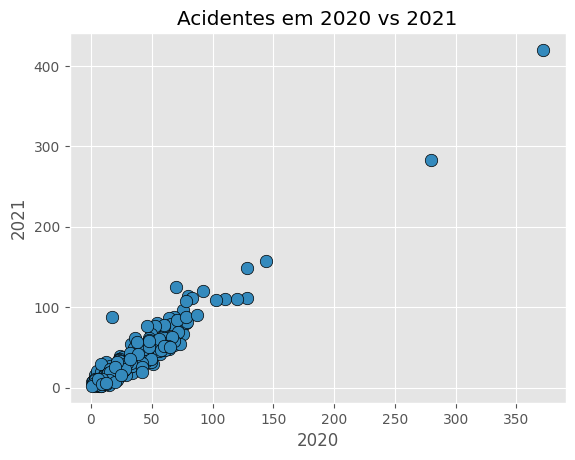

In [280]:
dados_2019_2020 = dados_2019.merge(dados_2020, on="bairro")
dados_2019_2021 = dados_2019.merge(dados_2021, on="bairro")
dados_2020_2021 = dados_2020.merge(dados_2021, on="bairro")

plot_acidentes_por_ano(dados_2019_2020)
plot_acidentes_por_ano(dados_2019_2021)
plot_acidentes_por_ano(dados_2020_2021)

#Problema 10

In [281]:
def standard_units(col):
    return (col - col.mean()) / np.std(col)

def calculate_r(df, x, y):
    x_su = standard_units(df.get(x))
    y_su = standard_units(df.get(y))
    return (x_su * y_su).mean()

def slope(df, x, y):
  r = calculate_r(df, x, y)
  return r * np.std(df.get(y)) / np.std(df.get(x))

def intercept(df, x, y):
  return df.get(y).mean() - slope(df, x, y) * df.get(x).mean()

def regression_line(df, x, y, linha):
  return slope(df, x, y) * linha + intercept(df, x, y)

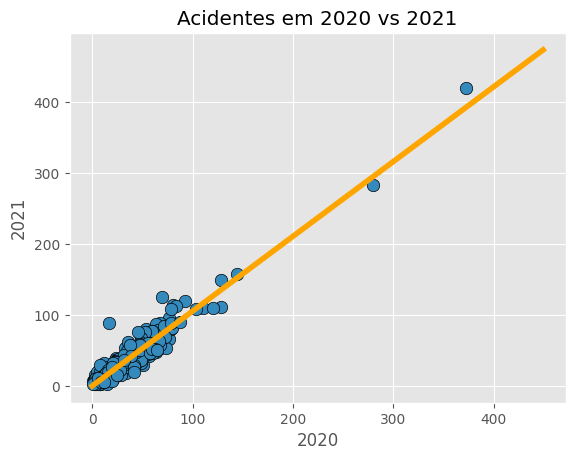

In [282]:
linha = np.arange(0, 450)

regressao_2019_2020 = regression_line(dados_2019_2020, "0_x", "0_y", linha)
regressao_2019_2021 = regression_line(dados_2019_2021, "0_x", "0_y", linha)
regressao_2020_2021 = regression_line(dados_2020_2021, "0_x", "0_y", linha)

plot_acidentes_por_ano(dados_2020_2021)
plt.plot(linha, regressao_2020_2021, color='orange', lw=4, label='regression line')

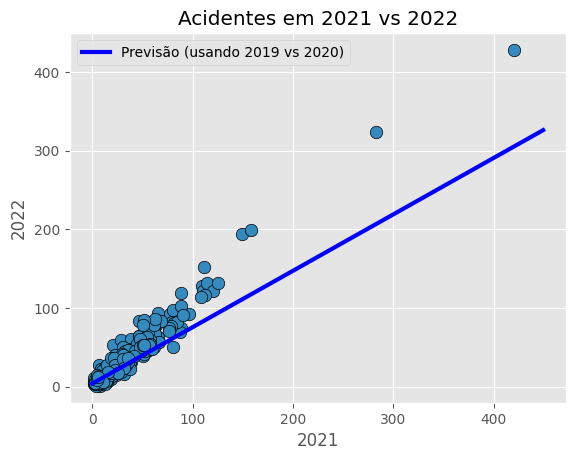

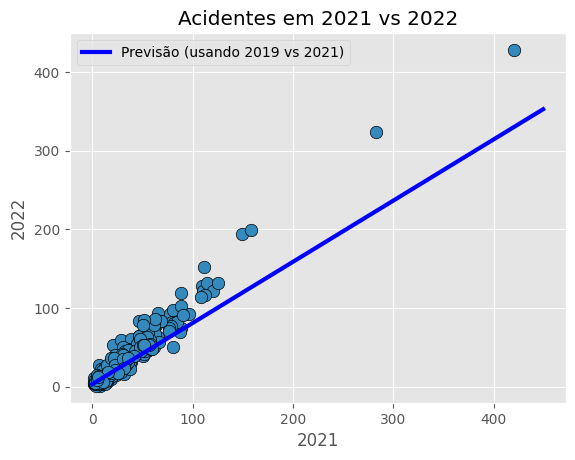

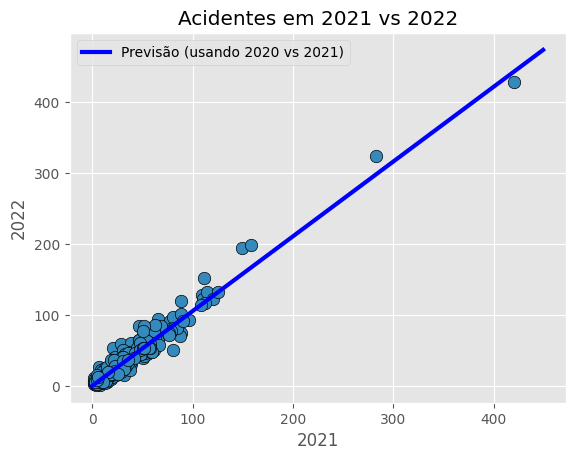

In [283]:
dados_2022 = acidentes_ano_bairro[acidentes_ano_bairro.get('ano') == 2022]

dados_2021_2022 = dados_2021.merge(dados_2022, on="bairro")

def plot_por_ano_com_previsao(df_merge, linha, r, periodo_referencia):
  plot_acidentes_por_ano(df_merge)
  plt.plot(linha, r, color='blue', lw=3, label=('Previsão (usando ' + periodo_referencia + ')'))
  plt.legend()

plot_por_ano_com_previsao(dados_2021_2022, linha, regressao_2019_2020, "2019 vs 2020")
plot_por_ano_com_previsao(dados_2021_2022, linha, regressao_2019_2021, "2019 vs 2021")
plot_por_ano_com_previsao(dados_2021_2022, linha, regressao_2020_2021, "2020 vs 2021")

Como se pode ver, a previsão usando o período 2020-2021 foi muito mais precisa de que as usando 2019-2020 ou 2019-2021. Isso provavelmente se deve ao fato de que o número de acidentes de carro se reduziu muito de 2019 para 2020 devido à pandemia, tornando modelos baseados nessa mudança imprecisos quando lidam com outros períodos.

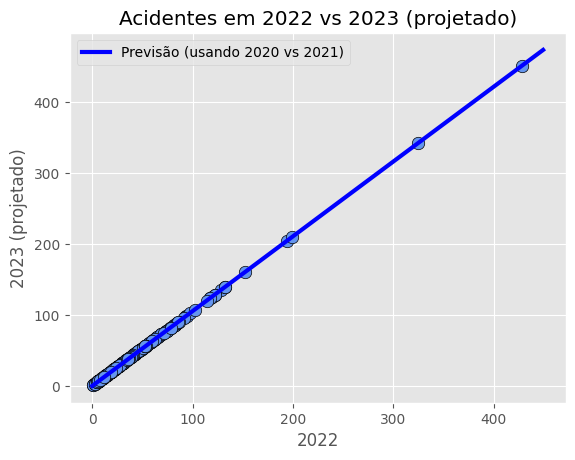

In [284]:
r_2020_2021 = slope(dados_2020_2021, "0_x", "0_y")
intercepto_2020_2021 = intercept(dados_2020_2021, "0_x", "0_y")

projecao_2023 = dados_2021_2022.get("0_y") * r_2020_2021 + intercepto_2020_2021

plt.plot(linha, regressao_2020_2021, color='blue', lw=3, label=('Previsão (usando 2020 vs 2021)'))
plt.scatter(x=dados_2021_2022.get("0_y"), y=projecao_2023, s=80, edgecolor="black", color="cornflowerblue")

plt.xlabel("2022")
plt.ylabel("2023 (projetado)")
plt.title("Acidentes em 2022 vs 2023 (projetado)")
plt.legend()

# Problema 11

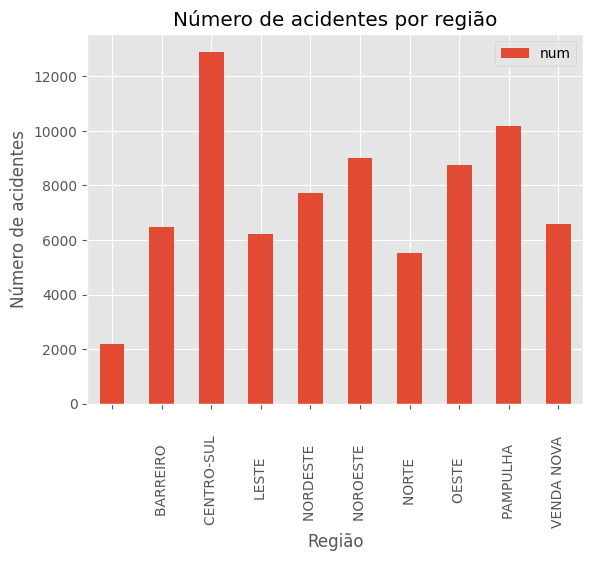

In [285]:
acidentes_por_regiao = df.groupby("desc_regional").size().reset_index()
acidentes_por_regiao = acidentes_por_regiao.assign(num = acidentes_por_regiao.iloc[:,1])

acidentes_por_regiao.plot(kind="bar", x="desc_regional", y="num")

plt.ylabel("Número de acidentes")
plt.xlabel("Região")
plt.title("Número de acidentes por região")
plt.legend()

Como pode-se ver, a região de BH com mais acidentes é o centro-sul, enquanto a com menos acidentes é o norte. Interessantemente, pode-se ver que uma parte não-negligível dos acidentes não recebe código de região -- a parte sem rótulo do eixo X.